<h1>This Jupyter Notebook explores the Titanic dataset and implements various classifiers for predicting survival.</h1>

<h2> Let's start by importing the necessary libraries for data manipulation and visualization: </h2>

<h3>import needed libraries</h3>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3>Loading the titanic dataset</h3>

In [32]:
# Load the training dataset
train_df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>Explore Basic Information</h3>


In [33]:
# Display basic information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3>Distribution of classes</h3>


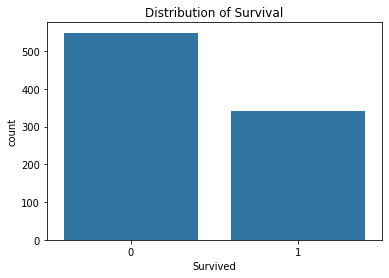

In [34]:
# Visualize the distribution of the 'Survived' variable
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survival')
plt.show()

### Check for Missing Values


In [35]:
# Check for missing values in the dataset
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display missing values
missing_values

Cabin       687
Age         177
Embarked      2
dtype: int64

### Explore Basic Statistics and Distributions of Features


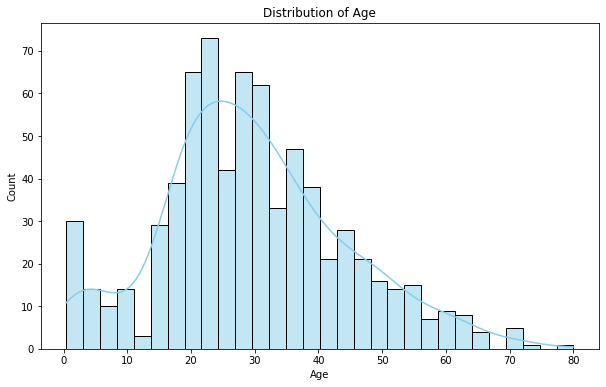

In [36]:
# Display basic statistics of numerical features
statistics_summary = train_df.describe()

# Display basic statistics of categorical features
categorical_summary = train_df.describe(include=['object'])

# Explore the distribution of 'Age' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Visualize Data to Gain Insights


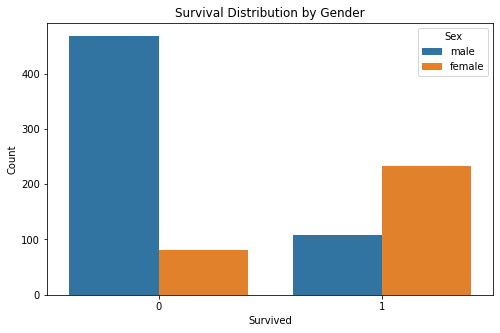

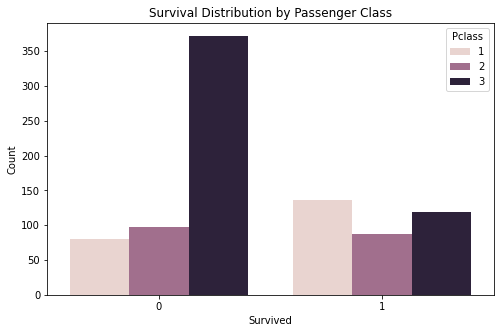

In [37]:
# Visualize the survival distribution by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Distribution by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

# Visualize the survival distribution by passenger class
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()


## Data Cleaning


### Handle Missing Values


In [38]:
# Check for missing values before handling
missing_values_before = train_df.isnull().sum()
missing_values_before = missing_values_before[missing_values_before > 0].sort_values(ascending=False)

# Display missing values before handling
missing_values_before

Cabin       687
Age         177
Embarked      2
dtype: int64

In [39]:
# Impute missing values for 'Age' using the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Impute missing values for 'Embarked' using the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to a large number of missing values
train_df.drop('Cabin', axis=1, inplace=True)


#### Convert Categorical Variables into Numerical Representations


In [40]:
# Convert 'Sex' and 'Embarked' to numerical representations
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)


#### Drop Irrelevant Features


In [41]:
# Drop irrelevant features: 'PassengerId', 'Name', 'Ticket'
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


### Check for Missing Values After Handling


In [42]:
# Check for missing values after handling
missing_values_after = train_df.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0].sort_values(ascending=False)

# Display missing values after handling
missing_values_after


Series([], dtype: int64)

### Display the updated dataset after dropping irrelevant features


In [43]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


### Feature Engineering


#### Create New Features


In [44]:
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Create a new feature 'IsAlone' indicating whether the passenger is traveling alone
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype('int')

# Display the dataset with new features
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,0,1,2,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0
2,1,3,0,26.0,0,0,7.9250,0,1,1,1
3,1,1,0,35.0,1,0,53.1000,0,1,2,0
4,0,3,1,35.0,0,0,8.0500,0,1,1,1


#### Convert Categorical Features into One-Hot Encoded Vectors


In [45]:
# Convert categorical variable 'Pclass' into one-hot encoded vectors
pclass_dummies = pd.get_dummies(train_df['Pclass'], prefix='Pclass')
train_df = pd.concat([train_df, pclass_dummies], axis=1)
train_df.drop('Pclass', axis=1, inplace=True)

# Display the dataset with one-hot encoded vectors
train_df.head()


,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,0,1,2,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,2,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,1,1,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,1,2,0,1,0,0
4,0,1,35.0,0,0,8.0500,0,1,1,1,0,0,1


## Model Implementation


### Support Vector Machines (SVM)

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [47]:
# Separate features (X) and target variable (y)
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Initialize SVM classifier
svm_classifier = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X, y)

# Display the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits


#### hyperparameters tuning visualization

In [ ]:
# Extract results of hyperparameter tuning
results = pd.DataFrame(grid_search.cv_results_)

# Plot the mean test scores for each combination of hyperparameters
plt.figure(figsize=(12, 6))
sns.lineplot(x='param_C', y='mean_test_score', hue='param_kernel', data=results, marker='o')
plt.xscale('log')
plt.title('Hyperparameter Tuning for SVM')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()
